In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [5]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    # TODO HERE
    """
    :param x_train: ndarray, shape (n_samples, n_features)
    :param y_train: ndarray, shape (n_samples,)
    :param k: int, number of folds
    :return: list of k sublists, each sublist contains the index of training data and validation data
    """

    # shuffle the data
    #permutation = np.random.permutation(len(y_train))
    #x_train, y_train = x_train[permutation], y_train[permutation]

    n_samples = len(y_train)
    fold_sizes = np.full(k, n_samples // k, dtype=np.int)
    fold_sizes[:n_samples % k] += 1
    current = 0
    kfold_data = []
    
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        validation_index = np.arange(start, stop)
        train_index = np.concatenate([np.arange(0, start), np.arange(stop, n_samples)])
        kfold_data.append([train_index, validation_index])
        current = stop

    return kfold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  4  5  6  7  8  9 11 13 14 15 16 17 18], Validation index: [ 3 10 12 19]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 19], Validation index: [ 8  9 17 18]
Split: 3, Training index: [ 0  2  3  5  6  7  8  9 10 12 13 15 16 17 18 19], Validation index: [ 1  4 11 14]
Split: 4, Training index: [ 1  3  4  5  6  8  9 10 11 12 14 15 16 17 18 19], Validation index: [ 0  2  7 13]
Split: 5, Training index: [ 0  1  2  3  4  7  8  9 10 11 12 13 14 17 18 19], Validation index: [ 5  6 15 16]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [9]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [40]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search

c_range = [0.001, 0.1, 1, 10, 100]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1]

best_score = 0

k = 5
kfold_data = cross_validation(x_train, y_train, k)

Gridsearsh = np.zeros((len(c_range), len(gamma_range)))

for c in c_range:
    for gamma in gamma_range:
        score_sum = 0
        for train_indices, val_indices in kfold_data:
            x_train_fold = x_train[train_indices]
            y_train_fold = y_train[train_indices]
            x_val_fold = x_train[val_indices]
            y_val_fold = y_train[val_indices]
            

            clf.set_params(C=c, gamma=gamma)
            clf.fit(x_train_fold, y_train_fold)
            y_val_pred = clf.predict(x_val_fold)
            score_sum += accuracy_score(y_val_fold, y_val_pred)
            
            

        average_score = score_sum / k
        Gridsearsh[c_range.index(c), gamma_range.index(gamma)] = average_score
        if average_score > best_score:
            best_score = average_score
            best_c = c
            best_gamma= gamma


best_parameters=(best_c, best_gamma)

In [41]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (1, 0.0001)


# Q3

[[0.497 0.497 0.497 0.497 0.497]
 [0.981 0.497 0.497 0.497 0.497]
 [0.995 0.497 0.497 0.497 0.497]
 [0.995 0.497 0.497 0.497 0.497]
 [0.995 0.497 0.497 0.497 0.497]]


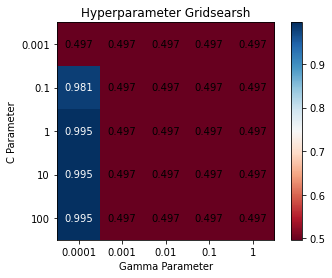

In [42]:
# Plot the grid search results of your SVM

# TODO HERE
Gridsearsh = np.round(Gridsearsh,3)
print(Gridsearsh)

plt.imshow(Gridsearsh, interpolation='nearest', cmap=plt.cm.RdBu)
plt.title('Hyperparameter Gridsearsh')
plt.xlabel('Gamma Parameter')
plt.ylabel('C Parameter')

x = [i for i in range(len(gamma_range))]
y = [i for i in range(len(c_range))]

plt.xticks(x, gamma_range)
plt.yticks(y, c_range)
plt.colorbar()

thresh=Gridsearsh.max()/4
iter=np.reshape([[[i, j] for j in range(len(gamma_range))] for i in range(len(c_range))], (Gridsearsh.size, 2))
for i, j in iter:
    if Gridsearsh[i, j] < thresh or Gridsearsh[i, j] > thresh * 3:
        plt.text(j, i, format(Gridsearsh[i, j]), va='center', ha='center', color="white")
    else:
        plt.text(j, i, format(Gridsearsh[i, j]), va='center', ha='center', color="black")

plt.show()

## Q4

In [13]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
